# Example of how to use the benchmark module

## imports

In [1]:
# reading data
from lspy.io.tsplib import read_tsplib

# termination criterion
from lspy.termination.max_seconds_termination_criterion import MaxSecondsTerminationCriterion

# move functions
from lspy.localsearch.move.tsp_array_swap import TspArraySwap
from lspy.localsearch.move.array_reverse_order import ArrayReverseOrder

# evaluation function
from lspy.evaluation.tsp_evaluation_function import TspEvaluationFunction

# Problem class
from lspy.problem.array_problem import ArrayProblem

# simulated annealing
from lspy.localsearch.simulatedannealing.simulated_annealing import SimulatedAnnealing
from lspy.localsearch.simulatedannealing.geometric_cooling_function import GeometricCoolingFunction
from lspy.localsearch.simulatedannealing.cnst_iterations_temp_function import CnstIterationsTempFunction

# steepest descent
from lspy.localsearch.steepestdescent.steepest_descent import SteepestDescent

# benchmark
from lspy.benchmark.benchmark import benchmark
# benchmark statistics
import lspy.benchmark.statistics as stat 
# note the "as stat", 
# python already has a package named "statistics" in it's standard library, 
# because of this it's better to import the package under a different name than statistics

# plotting
from lspy.plot.plot import plot
from lspy.plot.plot import plot_single_stat


## Read data

In [2]:
data = read_tsplib('data/gr48.tsp')
distance_matrix = data[0]

size = distance_matrix.shape[0]

## Benchmark

### Init

In [3]:
# init termination criterion

termination_criterion = MaxSecondsTerminationCriterion(5)

In [4]:
# init solutions

move_1 = TspArraySwap(size)

evaluation_1 = TspEvaluationFunction(distance_matrix, move_1)

problem_1 = ArrayProblem(evaluation_1, move_1, size)



move_2 = ArrayReverseOrder(size)

evaluation_2 = TspEvaluationFunction(distance_matrix, move_2)

problem_2 = ArrayProblem(evaluation_2, move_2, size)

# make tuple of Problems

problem_tuple = (problem_1, problem_2)

In [5]:
# init algorithms
#
# Note that there is no Problem or termination criterion given to the algorithms,
# this isn't needed, benchmark will always set the Problem and Termination criterion.
#
# The parameter benchmarking must be True for all algorithms.

cooling_func = GeometricCoolingFunction(0.95)
i_for_temp = CnstIterationsTempFunction(1500)

algorithm_1 = SimulatedAnnealing(None, None,cooling_func, i_for_temp, benchmarking=True)


algorithm_2 = SteepestDescent(None, benchmarking=True)

# make tuple of algorithms

alg_tuple = (algorithm_1, algorithm_2)

### Run benchmark

In [6]:
# performs 3 runs of every Problem-algorithm pair

result=benchmark(problem_tuple, alg_tuple, termination_criterion, 3) 

## Results

In [7]:
# Note that one can access the results of a single run quite easily:
#
# result[a][b][c]
# 
# a: index of the algorithm in the tuple or list given to benchmark
# b: index of the Problem in the tuple or list given to benchmark
# c: number of run must be in the interval: [0, total_amount_of_runs - 1]

print(result)

[[[Results(best_order=array([ 0, 46, 14, 38, 19,  9,  4, 24, 36, 22, 18,  2, 33, 40, 41,  1, 37,
       42, 17, 32, 21, 35, 20, 13, 30, 11, 39, 34, 23, 44, 29,  3, 43, 45,
       16, 26,  5, 25, 27, 15, 28, 47,  7, 31,  8,  6, 10, 12]), best_value=12184, data=Data(time=array([0.0000000e+00, 1.7980000e-04, 2.5470000e-04, ..., 4.9995599e+00,
       4.9996785e+00, 4.9996948e+00]), iteration=array([    0,     0,     1, ..., 62395, 62396, 62397]), temperature=array([2000.        , 2000.        , 2000.        , ...,  244.17309747,
        244.17309747,  231.9644426 ]), value=array([19837, 19886, 20353, ..., 13249, 13255, 13255]), best_value=array([19837, 19837, 19837, ..., 12184, 12184, 12184]))), Results(best_order=array([ 0, 42, 40, 32, 27, 12, 47, 10,  7, 13, 16, 21, 31, 26, 20, 25, 14,
        3, 19, 33, 41, 38, 36, 39, 29, 37, 43, 17, 15, 28, 45, 46, 22,  1,
        5,  6, 44, 34, 23, 35,  2, 18, 24,  9, 30, 11,  4,  8]), best_value=13298, data=Data(time=array([0.0000000e+00, 2.7900000e

### using lspy.benchmark.statistics to gain data from the results

#### Get all possible statistics

In [8]:
various=stat.stat(result)

# note for all results that the statistics are calculated with the runs of a single algorithm problem pair
#
# One can access the results of a pair easily:
#
# single_statistic[a][b]
# 
# a: index of the algorithm in the tuple or list given to benchmark
# b: index of the Problem in the tuple or list given to benchmark
# 


In [9]:
# statistics best value

print(various.best_value.mean)
print(various.best_value.median)
print(various.best_value.stdev) # standard deviation
print(various.best_value.max)
print(various.best_value.min)

[[12455 14797]
 [ 7073  6520]]
[[12184 14770]
 [ 7073  6520]]
[[745.41062509 262.59474481]
 [  0.           0.        ]]
[[13298 15073]
 [ 7073  6520]]
[[11883 14550]
 [ 7073  6520]]


In [10]:
# statistics time

print(various.time.mean)
print(various.time.median)
print(various.time.stdev) # standard deviation
print(various.time.max)
print(various.time.min)

[[4.99976453 4.9997733 ]
 [1.67848933 5.11708377]]
[[4.9997755 4.9996656]
 [1.7426023 5.104988 ]]
[[6.49481588e-05 3.77552235e-04]
 [1.77166226e-01 2.58636394e-02]]
[[4.9998233 5.000193 ]
 [1.8146738 5.146779 ]]
[[4.9996948 4.9994613]
 [1.4781919 5.0994843]]


In [11]:
# statistics iterations

print(various.iterations.mean)
print(various.iterations.median)
print(various.iterations.stdev) # standard deviation
print(various.iterations.max)
print(various.iterations.min)

[[59943 21622]
 [   37    25]]
[[62397 21409]
 [   37    25]]
[[7365.67145615  619.59583601]
 [   0.            0.        ]]
[[65769 22320]
 [   37    25]]
[[51664 21137]
 [   37    25]]


#### get a single statistic

In [12]:
# from function

print(stat.biggest(result))

[[13298 15073]
 [ 7073  6520]]


In [13]:
# from the result of the function stat

print(various.best_value.max)

[[13298 15073]
 [ 7073  6520]]


#### plotting a single statistic

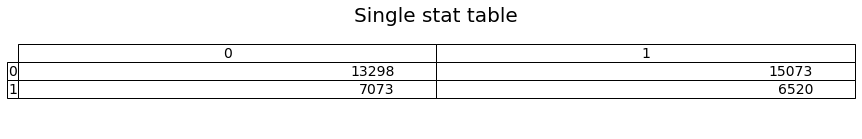

In [14]:
# simple plot

plot_single_stat(various.best_value.max)

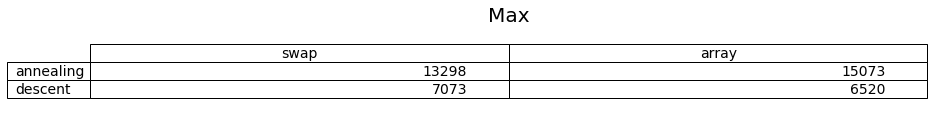

In [15]:
# cleaner plot

plot_single_stat(various.best_value.max, 'Max', ['annealing', 'descent'], ['swap', 'array'])

### Plotting the data from a single run

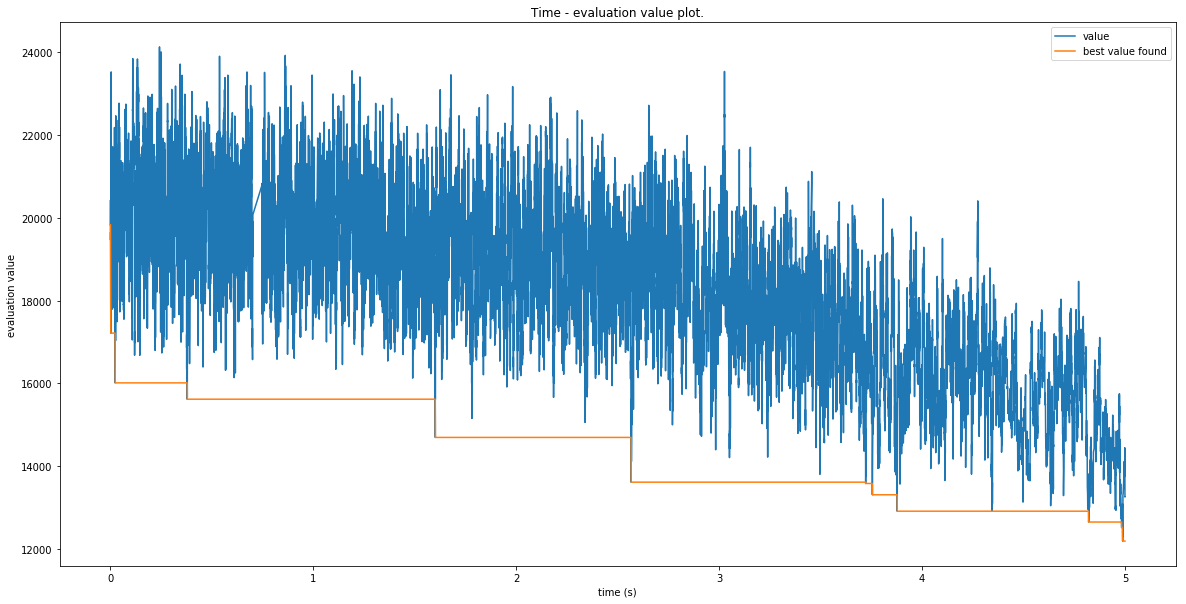

In [16]:
# annealing swap run 0

plot(result[0][0][0].data)

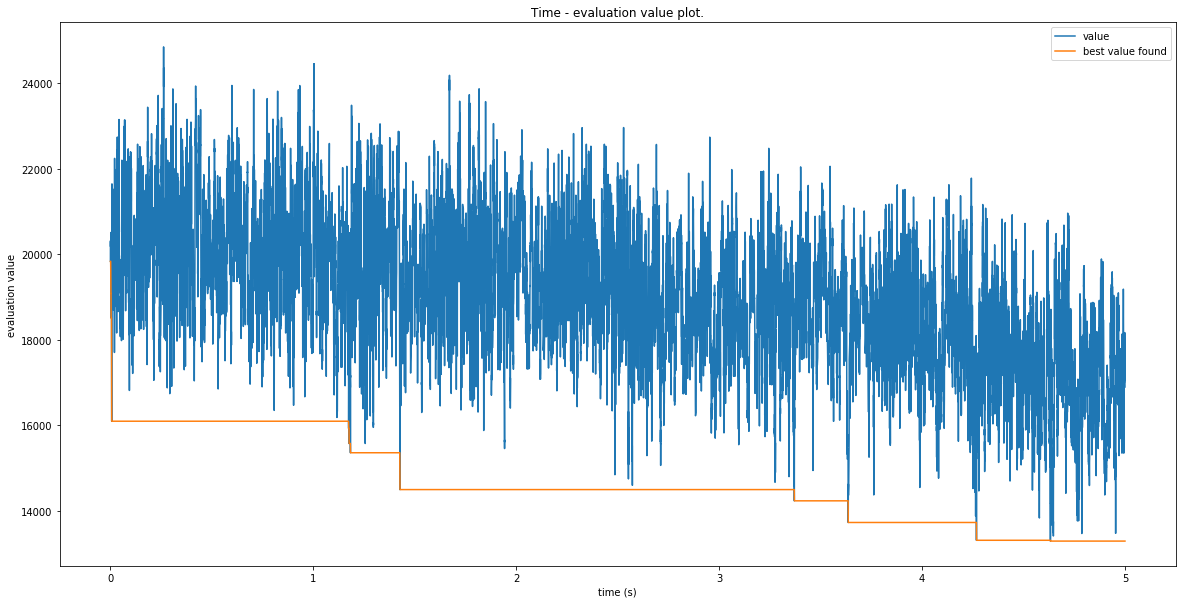

In [17]:
# annealing swap run 1

plot(result[0][0][1].data)

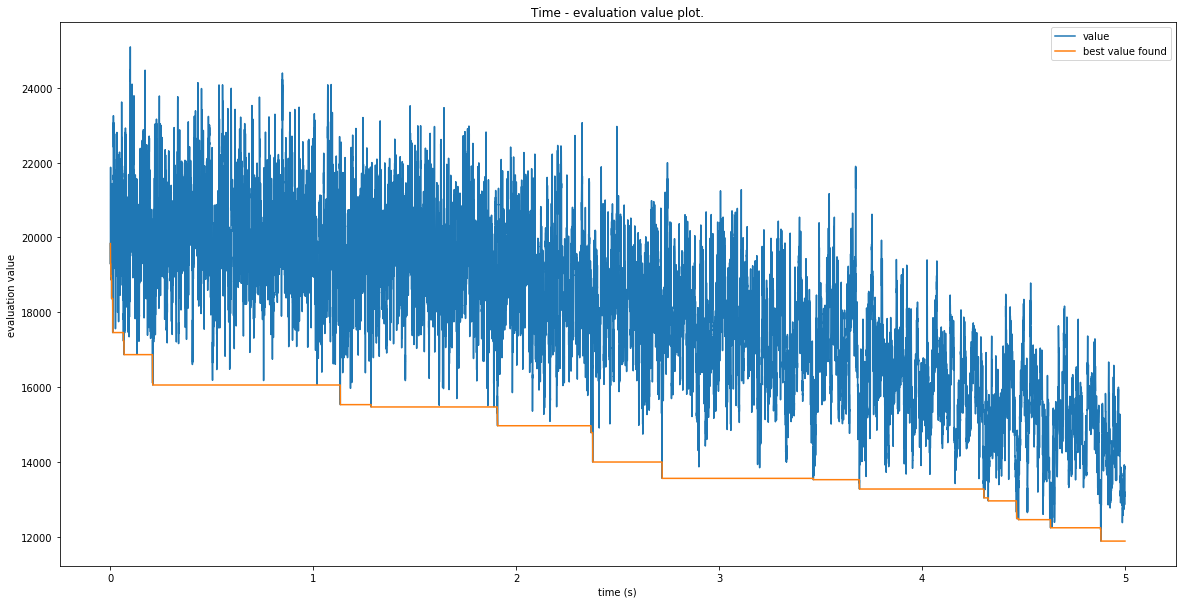

In [18]:
# annealing swap run 2

plot(result[0][0][2].data)

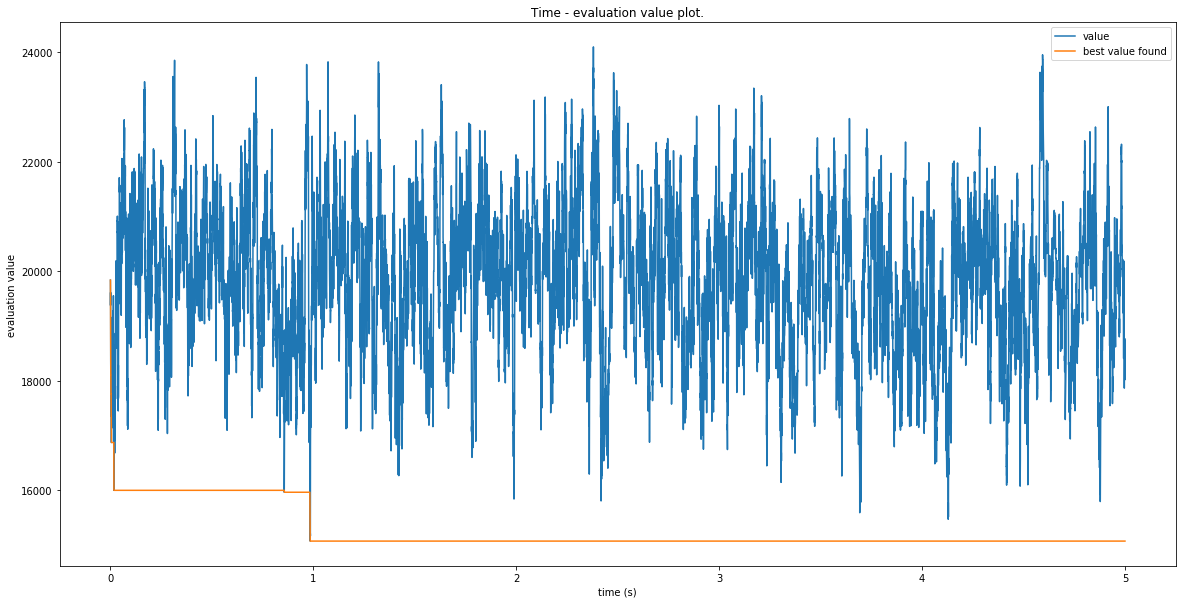

In [19]:
# annealing reverse run 0

plot(result[0][1][0].data)

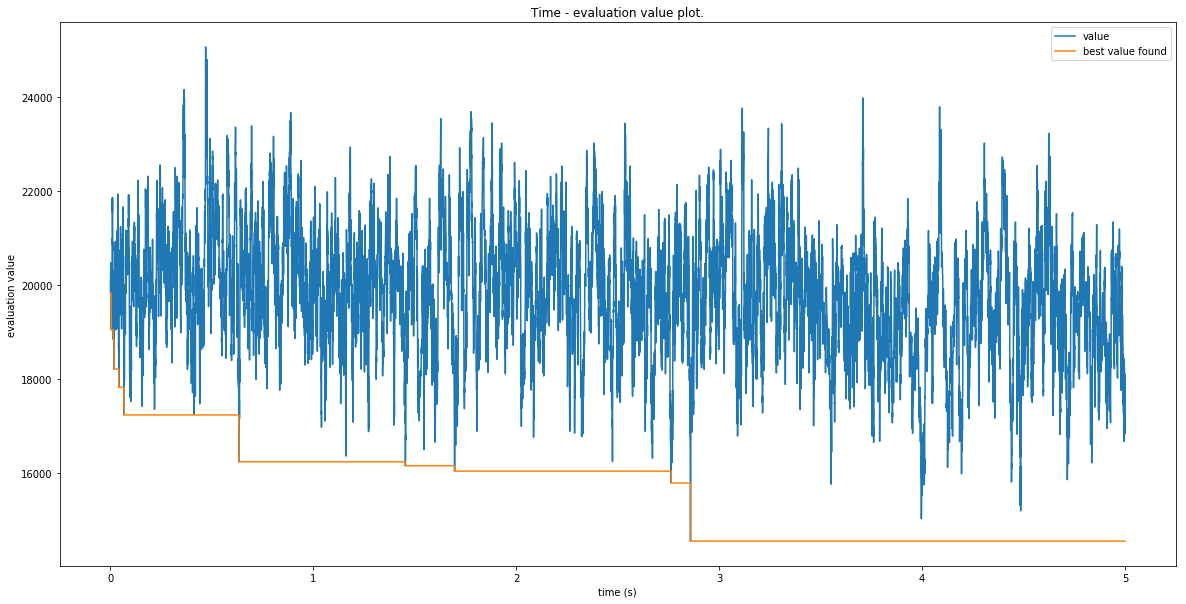

In [20]:
# annealing reverse run 1

plot(result[0][1][1].data)

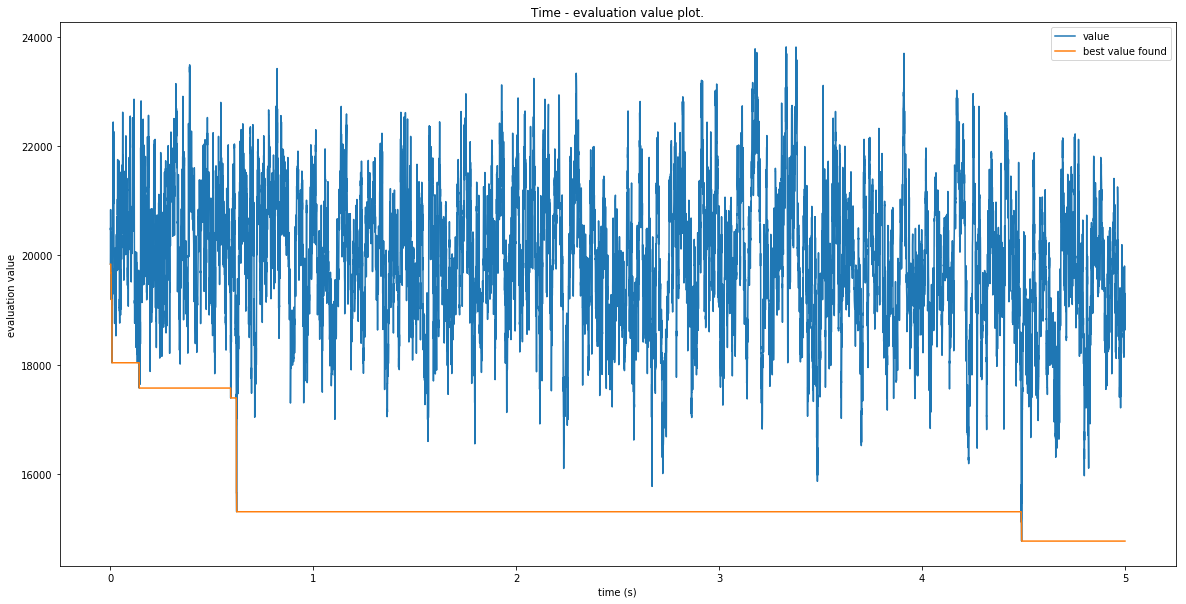

In [21]:
# annealing reverse run 2

plot(result[0][1][2].data)

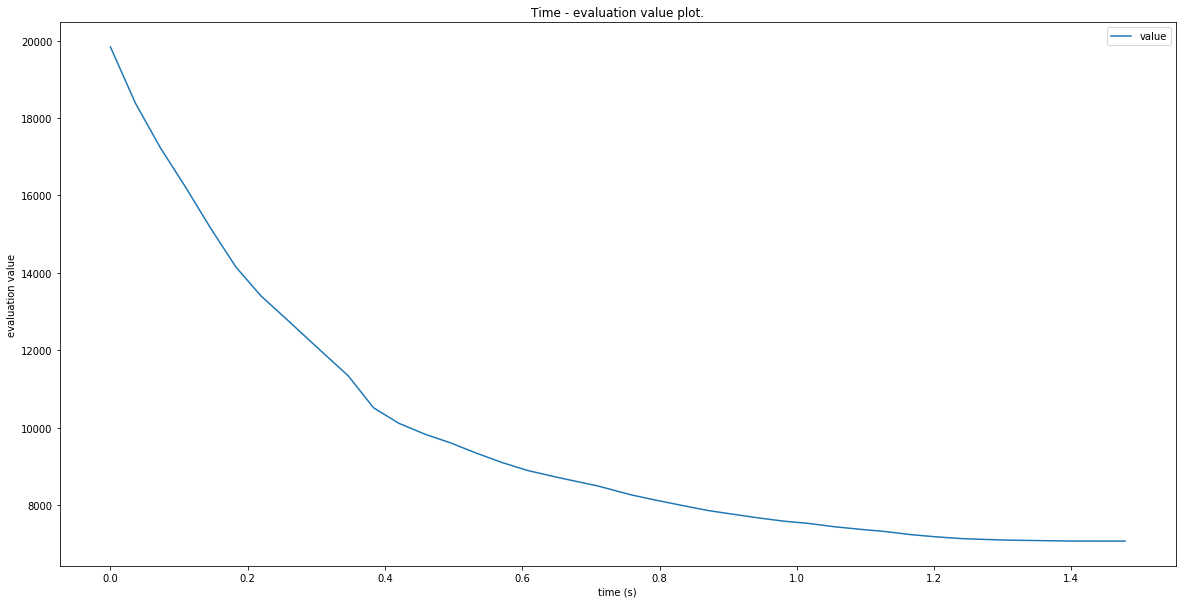

In [22]:
# descent swap run 0 (run 0, 1 and 2 should be almost identical)

plot(result[1][0][0].data)

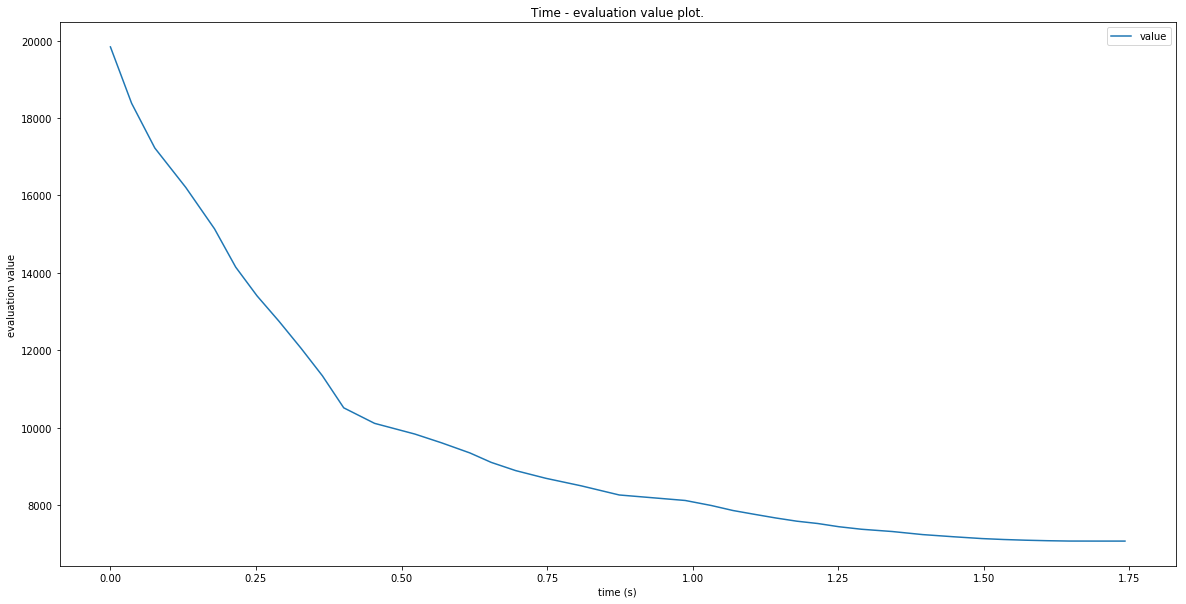

In [23]:
# descent swap run 1 (run 0, 1 and 2 should be almost identical)

plot(result[1][0][1].data)

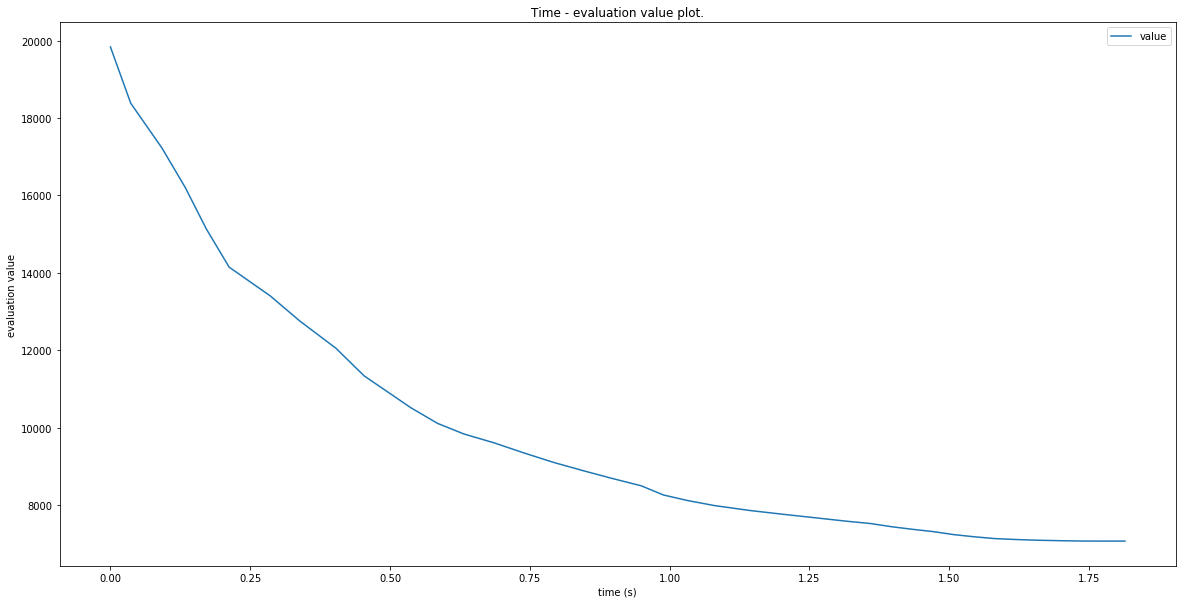

In [24]:
# descent swap run 2 (run 0, 1 and 2 should be almost identical)

plot(result[1][0][2].data)

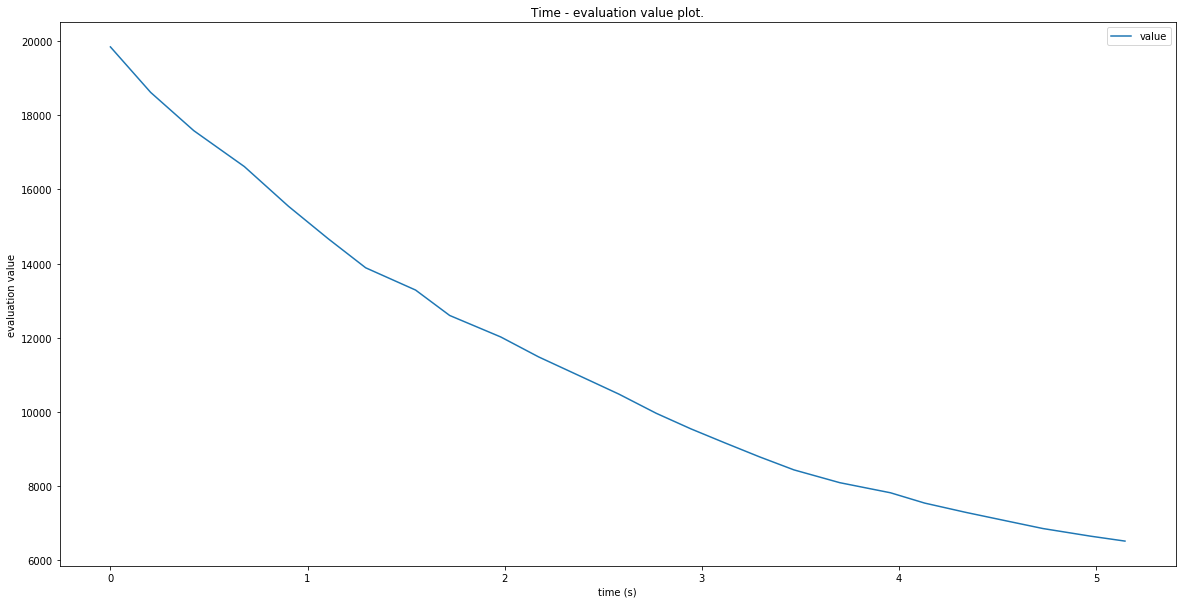

In [25]:
# descent reverse run 0 (run 0, 1 and 2 should be almost identical)

plot(result[1][1][0].data)

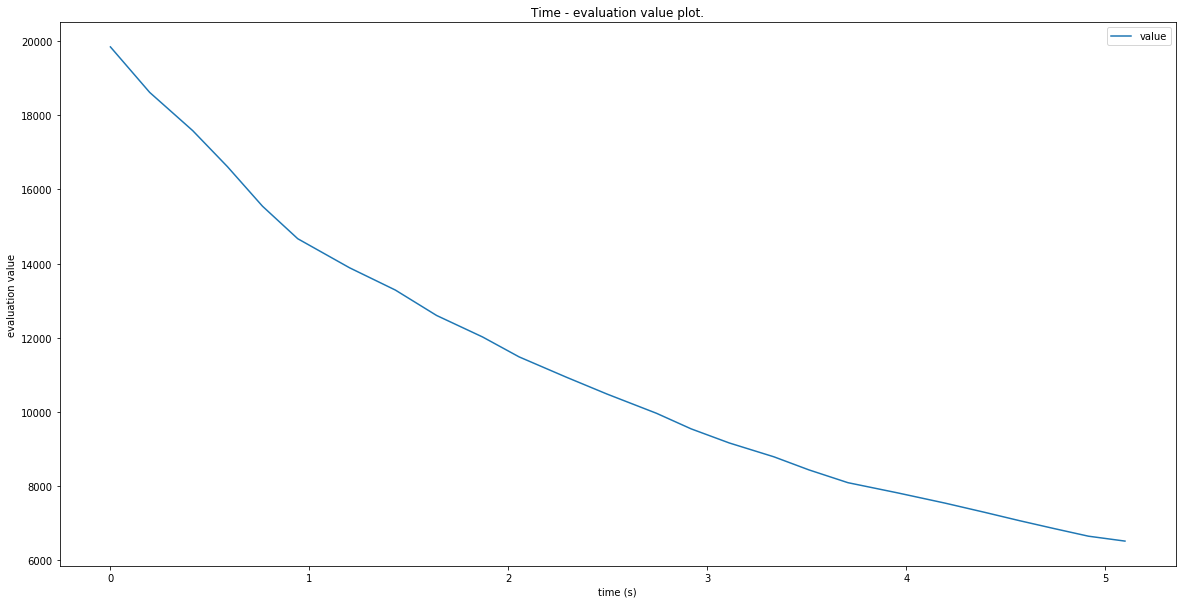

In [26]:
# descent reverse run 1 (run 0, 1 and 2 should be almost identical)

plot(result[1][1][1].data)

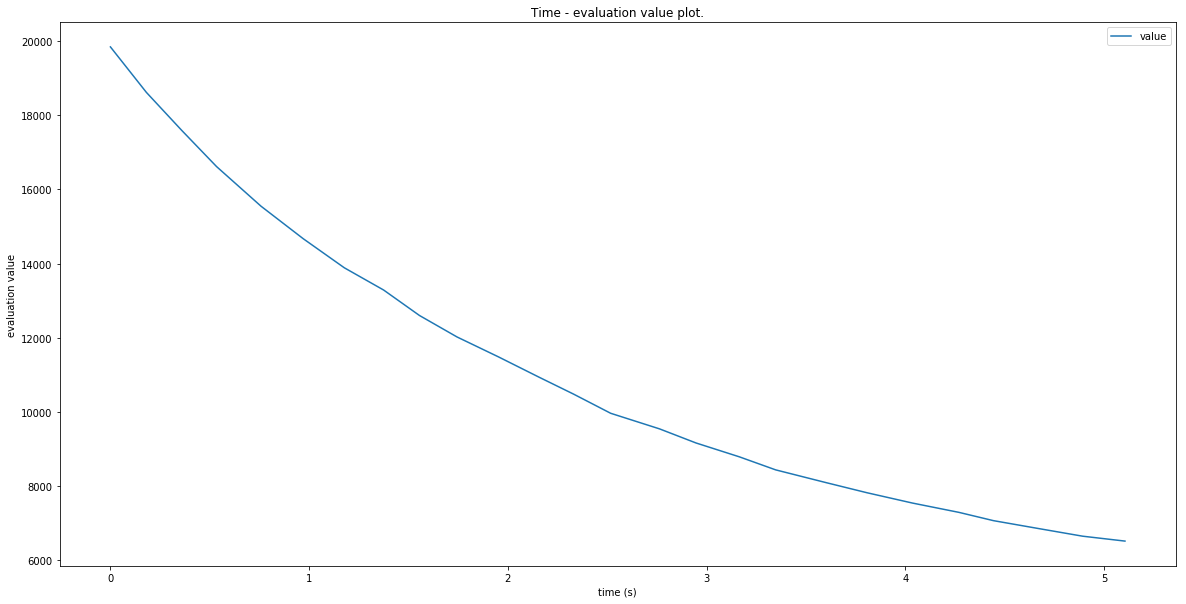

In [27]:
# descent reverse run 2 (run 0, 1 and 2 should be almost identical)

plot(result[1][1][2].data)